<h1><center>Medical Notes Categorization</center></h1>

![alt text here](https://aihms.in/blog/wp-content/uploads/2021/08/mt1.jpg)

## **Executive Summary**

The vast healthcare industry is an intricate and vital fabric of the livelihoods of billions across the world. Based on technological capabilities, different parts of the world vary in their tactics in making hospitals run more efficiently and treating patients more optimally.

Extensive and time consuming paperwork is one of the largest areas of innovation happening in today's world. Doctors on average spend more time per day updating patient health records than actually spending time with their patients. This brief study showcases the importance and committment physicians have for maintaining clinical documentation: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4507919/.

In this project, I plan to utilize text classification techniques to see how well notes that are taken by doctors can be understood and organized by machine learning algorithms. There are many avenues of patient note scribing that take place and I want to explore how technological systems can group notes, summarize a medical situation, and assess their meaning in the context of everyday healthcare dilemmas.

## **Problem Definition**

- We are trying to find innovative ways to classify pieces of textual data to a specific category through a classification model. This can eventually assist the healthcare system and its constituents in a variety of ways.
  - **Hospital**: Adequate organization of information will serve all stakeholders well. A hospital's virtual network of data will be better suited to carry out many tasks whether it is finding specific information, searching for potential patterns, or just general upkeep of patient history. Asides from clinical documemtation, use cases such as speech recognition can be more easily imbibed into modern hospital data framework. The hospital's bottom line through paperwork, cost cutting measures, and patient movement can become directly impacted by this.
  - **Physicians**: All medical personnel whether it be doctors, nurses, and other necessary hospital staff will save large amounts of time avoiding paperwork and manual search and find missions for patient data. A good model would be able to double check existing data and provide it to those that need it in accordance with HIPAA law.
  - **Patients**: Understanding patients and their history of circumstances will help the hospital make better decisions for their patients. There will be more time for medical staff to spend with patients, address necessary conditions and provide for treatments. The eventual value will and should trickle down to patients.
  - **Others**: The many helping hands of the healthcare network such as pharmacies that provide integral medicine, rehab centers that supply physical and mental conditioning, and nursing homes that give great amounts of patient care can all benefit greatly from consistent information across multiple channels. Also, if one person or group in the specific healthcare chain sees an irregular finding, they may be able to raise the alarm ahead of time.

### **The Key Questions:**

- Which medical specialties are most common among patients?
- What are the most common words used to describe these conditions?
- What emotion, attitude and potential bias are patient notes written or transcribed with and how do they differ across medical specialties?
- Can we use NLP and text classifier models to organize notes into correct categories?

## **Data Description**

The Patient Notes dataset contains sample medical transcriptions for various medical specialties for about 5000 patient visits. It was scraped from Transcribed Medical Transcription Sample Reports and Examples by Tara Boyle. The data gives us a brief overview of numerous, unique and everyday health conditions. 5 input variables were registered for each patient occurence.

* **Unnamed:** arbitrary record/row label

* **description:** short summary of transcription

* **medical_specialty:** category of transcription's medical classification

* **sample_name:** title of transcription

* **transcription:** spoken and unspoken sample of medical report

* **keywords:** relevant keywords from transcription

## **Libraries and Data**

In [ ]:
# Install the libraries to load transformers models
!pip install transformers -q

In [ ]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.register_matplotlib_converters()

# Import modules from scikit-learn for model building and machine learning tasks
# import scipy.stats as stats
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    precision_recall_curve,
    classification_report,
    make_scorer,
)

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Import TensorFlow for deep learning tasks
import tensorflow as tf

# Import NLP toolkit for necessary tasks
import nltk
from nltk.text import Text

# Import library for text preprocessing
import re

# Import modules from the Hugging Face transformers library
import torch
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
# Set the seed for the TensorFlow random number generator to ensure reproducibility
tf.random.set_seed(42)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MIT DSML/Capstone Projects/Medical Transcriptions/mednotes.csv')

In [ ]:
# Create a copy of the dataset
data = df.copy()

## **Data Overview**

In [ ]:
# Print first 5 rows of data
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
# Print last 5 rows of data
data.tail()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN
4998,4998,"Acute allergic reaction, etiology uncertain, ...",Allergy / Immunology,Allergy Evaluation Consult,"HISTORY: , A 34-year-old male presents today s...",NaN


In [ ]:
# Check sample description
data.loc[1000, 'description']

' Mild-to-moderate diverticulosis.  She was referred for a screening colonoscopy.  There is no family history of colon cancer.  No evidence of polyps or malignancy.'

In [ ]:
# Check sample medical specialty
data.loc[1000, 'medical_specialty']

' Surgery'

In [ ]:
# Check sample name
data.loc[1000, 'sample_name']

' Colonoscopy - 22 '

In [ ]:
# Check sample transcription
data.loc[1000, 'transcription']

'PROCEDURE: , Colonoscopy.,PREOPERATIVE DIAGNOSES:,  The patient is a 56-year-old female.  She was referred for a screening colonoscopy.  The patient has bowel movements every other day.  There is no blood in the stool, no abdominal pain.  She has hypertension, dyslipidemia, and gastroesophageal reflux disease.  She has had cesarean section twice in the past.  Physical examination is unremarkable.  There is no family history of colon cancer.,POSTOPERATIVE DIAGNOSIS: , Diverticulosis.,PROCEDURE IN DETAIL: , Procedure and possible complications were explained to the patient.  Ample opportunity was provided to her to ask questions.  Informed consent was obtained.  She was placed in left lateral position.  Inspection of perianal area was normal.  Digital exam of the rectum was normal.,Video Olympus colonoscope was introduced into the rectum.  The sigmoid colon is very tortuous.  The instrument was advanced to the cecum after placing the patient in a supine position.  The patient was well p

In [ ]:
# Check sample keywords
data.loc[1000, 'keywords']

'surgery, screening colonoscopy, colon cancer, colonoscopy, polyps, malignancy, sigmoid, rectum, cecum, diverticulosis'

In [ ]:
# Print shape of data
data.shape

(4999, 6)

**Observations:**

- The dataset has **4,999 rows and 6 columns**.

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Unnamed: 0,0
description,0
medical_specialty,0
sample_name,0
transcription,33
keywords,1068


**Observations:**

- There **are missing values** in the dataset, particularly in the **transcription and keywords** columns.

In [ ]:
# Find % of missing values for each column
data.isnull().sum()/data.shape[0]

,0
Unnamed: 0,0.000000
description,0.000000
medical_specialty,0.000000
sample_name,0.000000
transcription,0.006601
keywords,0.213643


In [ ]:
# Check for duplicates in the data
data.duplicated().sum()

0

**Observations:**

- This dataset has around **21% of rows with no keywords and 33 rows with missing transcriptions**.
- There are **no duplicates**.

In [ ]:
# Check for the distinct amount of descriptions
data.description.nunique()

2348

In [ ]:
# Check for the distinct amount of medical categories
data.medical_specialty.nunique()

40

In [ ]:
# Check for the distinct amount of sample names
data.sample_name.nunique()

2377

In [ ]:
# Check for the distinct amount of transcriptions
data.transcription.nunique()

2357

In [ ]:
# Check for the distinct amount of keyword groupings
data.keywords.nunique()

3849

**Observations:**

- There are **40 different medical specialties**.
- There are **~2300 unique descriptions, sample names, and transcriptions**. That seems like many are repeated.
- Almost all keyword groupings are unique. This makes sense as there are 1000+ values missing in this column.

In [ ]:
# Check the data type composition
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


**Observations:**

- The dataset is purely **object-based**. It may be good idea to convert the objects into **strings** for usability.
- The first column we might delete since it is just there for row labeling purposes.
- **1000 rows have no keywords** for their medical transcription.

## **Exploratory Data Analysis (EDA) and Visualization**

## Summary Statistics

In [ ]:
# Gather the object columns together
cat_cols = data.select_dtypes(['object']).columns.tolist()

In [ ]:
# Print the number of occurrences of each unique value in each categorical column
for column in cat_cols:
    print(data[column].value_counts(normalize = True))
    print("-" * 50)

description
An example/template for a routine normal male physical exam.                                                                                                                    0.0024
Common description of colonoscopy                                                                                                                                               0.0020
Sample progress note - Gen Med.                                                                                                                                                 0.0016
Sample normal ear, nose, mouth, and throat exam.                                                                                                                                0.0016
An example/template for a routine normal female physical exam.                                                                                                                  0.0012
                                                                         

**Observations:**

- For the most part, **4 of the 5 columns showcase a random and dispersed breakdown of the diverse set of values for each patient**.
- Each unique value or groupings of text for the description, sample_name and transcription columns all have inisgnificant/small frequencies in the data.
- The keyword **"gastroenterology" shows up the most relative to other keyword pairings. 2% of the all keyword values are gastroenterology meaning many patients may have issues in their stomach and intestines**. The next highest are "surgery" and "dialysis" related at ~.05% each.
- The **most common medical_specialty that patient notes are designated as is "Surgery" at more than 22%**. This indicates that many patients may need or are seeking serious medical care to fix serious health complications. The next highest grouping of patient notes belongs to the "Consult - History and Phy." category. More than 10% of patients are coming in for doctor checkups to inqiure about their current state in context to past medical history.

### **Univariate Analysis**

#### Distribution of medical specialty types

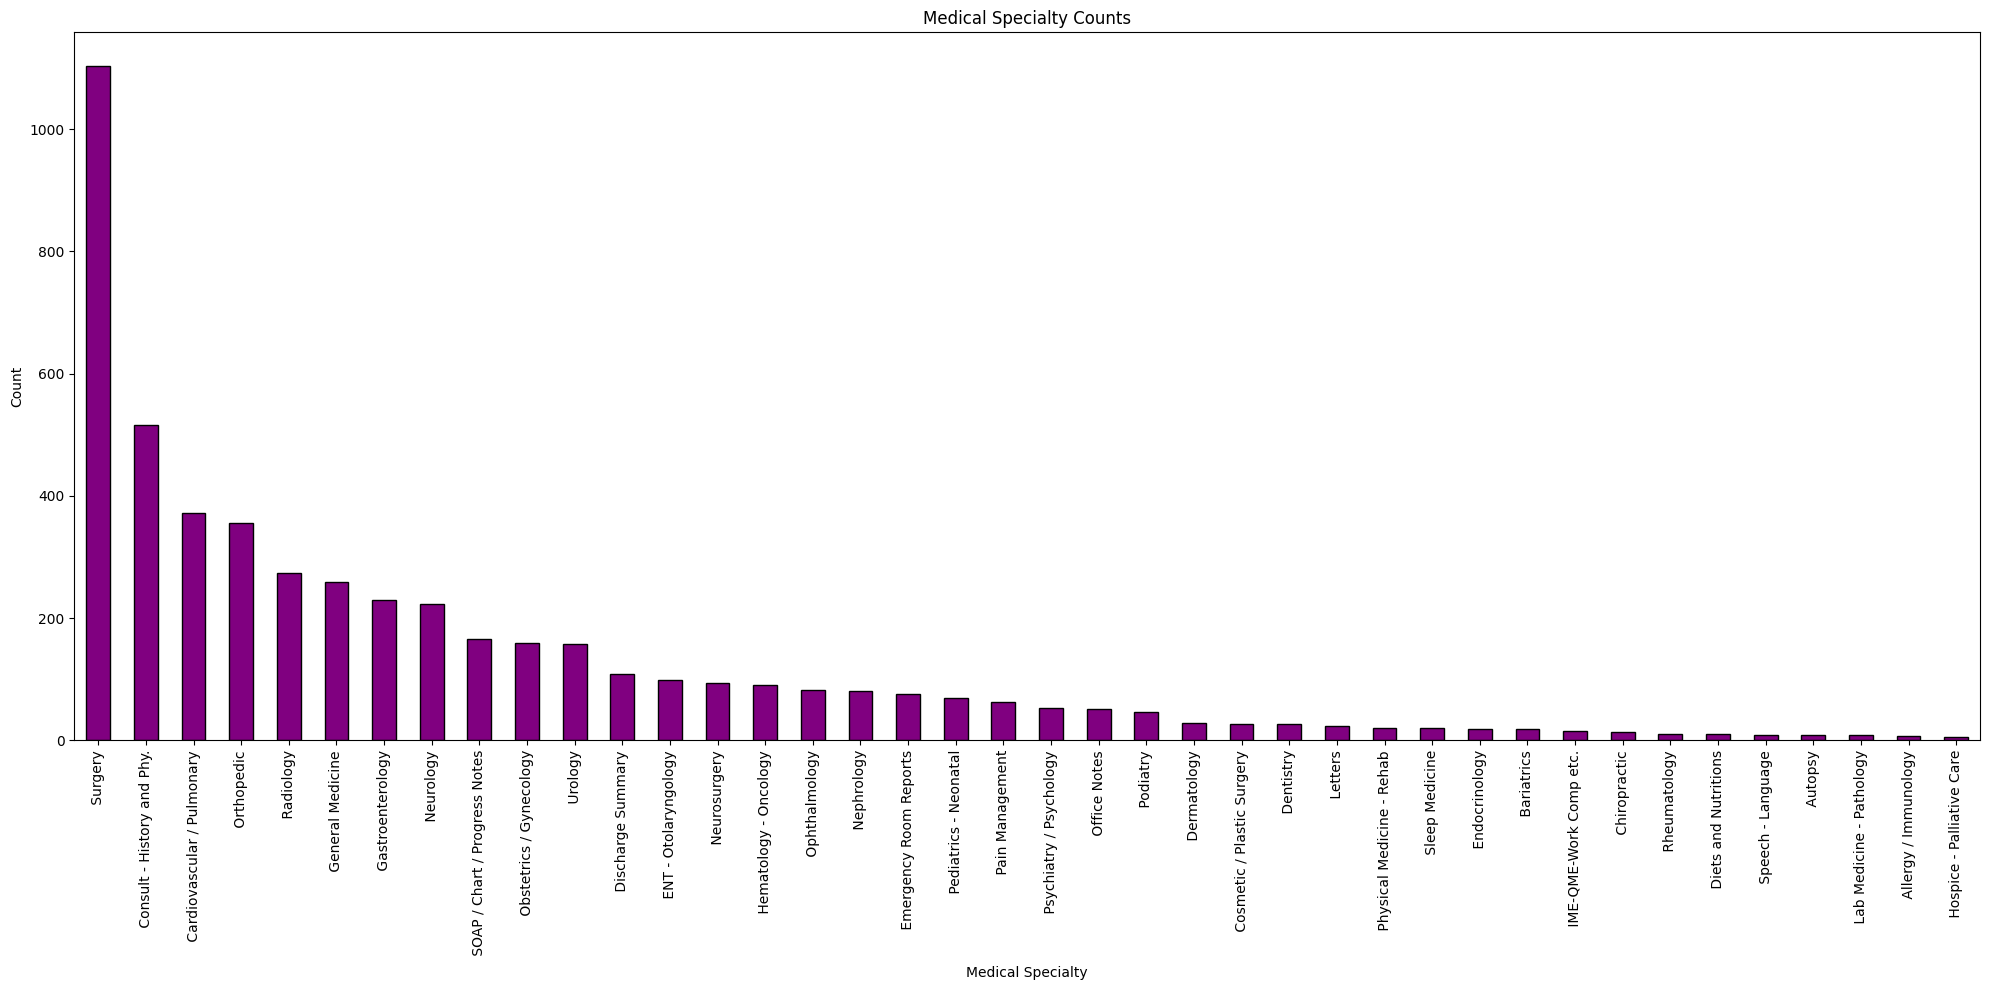

In [ ]:
# Function to plot a barplot for categorical variables
counts = data['medical_specialty'].value_counts()

plt.figure(figsize = (20, 10))
counts.plot(kind = 'bar', color = 'purple', edgecolor = 'black')
plt.title('Medical Specialty Counts')
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**Observations:**

- The above chart confirms our breakdown of the medical_specialty column. The **most common medical specialties patients are associated with are "Surgery" and "Consult - History and Phy."**.
- We won't explore the other columns through any visual representation since we know their general breakdown and because it will be thousands of unique values.

#### Distribution of common general words

In [ ]:
# Aggregate all strings from the description together to understand common word frequency
description = data["description"]
print(description[0])

string = ""
for i in description:
    string += i + " "
print(string[:200])

wordList = Text(string.split()) # string based list containing all descriptions

 A 23-year-old white female presents with complaint of allergies.
 A 23-year-old white female presents with complaint of allergies.  Consult for laparoscopic gastric bypass.  Consult for laparoscopic gastric bypass.  2-D M-Mode. Doppler.    2-D Echocardiogram  Morbi


Let's see how often certain words show up in our wordList!

In [ ]:
wordList.concordance("death")

Displaying 3 of 3 matches:
 diarrhea, nausea, inability to eat. Death summary of patient with advanced non
infection, and hypercholesterolemia. Death summary of an 80-year-old patient wi
 opposed to gastric bypass. Cause of death - Anoxic Encephalopathy Autopsy - As


Throughout the dataset, death was mentioned only 3 times.

In [ ]:
wordList.concordance("reaction")

Displaying 2 of 2 matches:
ed 6 total times since then. Local reaction secondary to insect sting. Patient
pertension, and hepatitis C. Local reaction secondary to insect sting. Patient


Throughout the dataset, reaction was mentioned only 2 times. Both times, the reaction was in relation to an insect sting. 2 patients may have come in for a similiar cause.

In [ ]:
wordList.concordance("pain")

Displaying 25 of 269 matches:
ing PHS system and placement of On-Q pain pump. Direct right inguinal hernia. 
hat she noticed there this bulge and pain for approximately six days prior to 
kin. Foul-smelling urine and stomach pain after meals. Cystoscopy and removal 
ry Urogram - IVP template Left flank pain and unable to urinate. Recurrent uri
ale with a history of bilateral knee pain for years progressively worse and de
with a history of right thoracic rib pain related to a herniated nucleus pulpo
loidectomy, right wrist. Right wrist pain with an x-ray showing a scapholunate
t salpingooophorectomy. Right pelvic pain and ovarian mass. Right ovarian cyst
ement flap closure. Complex Regional Pain Syndrome Type I. Stellate ganglion R
250-pound male presents with extreme pain in his left heel. External fixation 
ectomy with insertion of Pain-Buster Pain Management System. Percutaneous endo
rn of future diagnostic dilemma with pain crisis. Laparoscopic cholecystectomy
hat she noticed there 

Throughout the dataset, pain was mentioned 269 times. It is indeed a common symptom to describe patient condition, especially if some body part is hurting. The values above show that pain occurs in a wide variety of areas: wrist, abdominal, stomach, chest, and knee to name a few. Let's investigate the most common words in our entire description column.

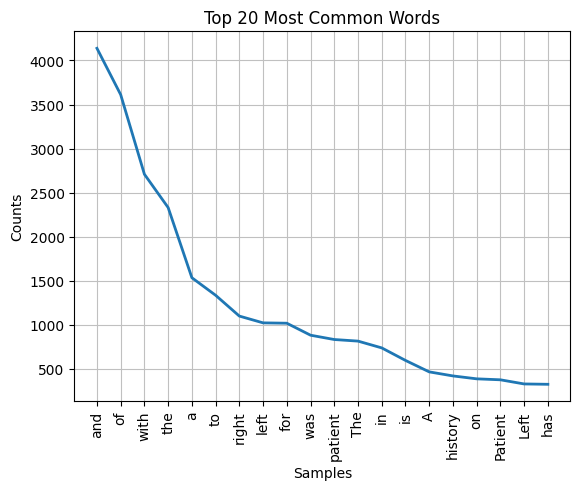

<Axes: title={'center': 'Top 20 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Find the most common words within aggregated string
from nltk import FreqDist
freq_dist = FreqDist(wordList) # creates a histogram of word count
freq_dist.most_common(20)
freq_dist.plot(20, title = 'Top 20 Most Common Words') # plots the count of common words

**Observations:**

- **The top 20 most common appearing words are simple words like "and", "of", "with" and "the". These are known as stop words.** We should eliminate them and see what the most common words in relation to patient condition are.

#### Distribution of common non stop words

In [ ]:
# Identify and Separate stop words to understand medical context (linguistic analysis)
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


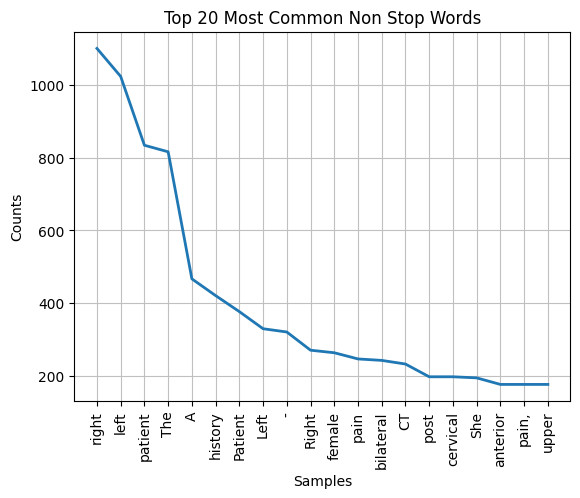

<Axes: title={'center': 'Top 20 Most Common Non Stop Words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Filter to capture common words with stop words taken out
wordsFiltered = [w for w in wordList if w not in stopWords] # keeps words that are not in the stop words list
freq_dist_no_stopwords = FreqDist(wordsFiltered)
freq_dist_no_stopwords.plot(20, title = 'Top 20 Most Common Non Stop Words')

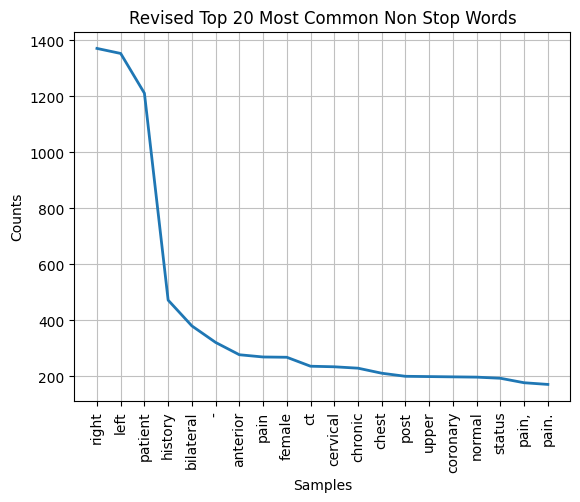

<Axes: title={'center': 'Revised Top 20 Most Common Non Stop Words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
# Filter to keep same words as above but use lowercase function to take out uppercase sentence starters like 'The' and 'A'
wordList_lower = [word.lower() for word in wordList] # creates the lowercase version of the text
wordsFiltered = [w for w in wordList_lower if w not in stopWords]
freq_dist_no_stopwords = FreqDist(wordsFiltered)
freq_dist_no_stopwords.plot(20, title = 'Revised Top 20 Most Common Non Stop Words')

**Observations:**

- After taking out stop words, **'right', 'left', and 'patient' appeared the most**. These are fairly straightforward terms to describe the directional attribites of patient symptoms.

#### Scattered Word Clouds

In [ ]:
# Create WordClouds from the description column to get a better idea of the different characteristics and symptoms of patients from their notes
import wordcloud as word

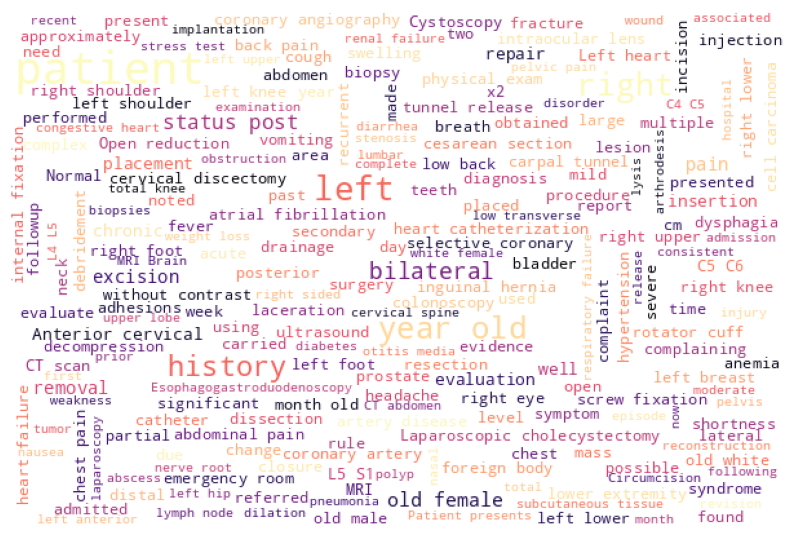

In [ ]:
# Descriptions
descriptionCloud = word.WordCloud(stopwords = word.STOPWORDS, max_font_size = 35, max_words = 3500, min_font_size = 10, width = 600, height = 400,
                      background_color = 'white', colormap = 'magma').generate(" ".join(data.description))
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(descriptionCloud, interpolation = 'bilinear')
ax.set_axis_off()
plt.imshow(descriptionCloud);

**Observations:**

- **The word cloud does a great job of displaying some important words from the description column regarding patient health, status, and need**. These are the words our transformer will use to try to guess the note's medical specialty.
    - **Organs** include nerve root, prostate, left foot, right shoulder, etc
    - **Conditions** include: inguinal hernia, debridement, artery disease, etc
    - **Operations** include colonoscopy, physical exam, insertion, biopsies, etc   
    - **Symptoms** include swelling, drainage, abdominal pain, chest pain, etc


#### Sentiment Analysis

An interesting exploratory analysis exercise for textual based data is sentiment analysis. This is the process of understanding context towards a group of text. In our example, sentiment analysis will help us understand the underlying attitude of patient notes. It can help us identify whether medical text is positive, negative, or neutral leaning.

In [ ]:
# Investigate emotional diagnosis of total aggregated notes based on different fragments and splits
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer() # use vader to do sentiment analysis

text = "".join(wordsFiltered) # create a single string

sentiment_dict = sia.polarity_scores(text)
sentiment_dict

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

We will create several different lists to split patient notes.

In [ ]:
# Add all medical specialties into one list; this will be helpful when charting sentiments
specialtyList = [] # string based list of all medical specialties
for category in df['medical_specialty']:
    if(category not in specialtyList):
        specialtyList.append(category)

for i in range(len(specialtyList)):
    print(i,specialtyList[i])

0  Allergy / Immunology
1  Bariatrics
2  Cardiovascular / Pulmonary
3  Neurology
4  Dentistry
5  Urology
6  General Medicine
7  Surgery
8  Speech - Language
9  SOAP / Chart / Progress Notes
10  Sleep Medicine
11  Rheumatology
12  Radiology
13  Psychiatry / Psychology
14  Podiatry
15  Physical Medicine - Rehab
16  Pediatrics - Neonatal
17  Pain Management
18  Orthopedic
19  Ophthalmology
20  Office Notes
21  Obstetrics / Gynecology
22  Neurosurgery
23  Nephrology
24  Letters
25  Lab Medicine - Pathology
26  IME-QME-Work Comp etc.
27  Hospice - Palliative Care
28  Hematology - Oncology
29  Gastroenterology
30  ENT - Otolaryngology
31  Endocrinology
32  Emergency Room Reports
33  Discharge Summary
34  Diets and Nutritions
35  Dermatology
36  Cosmetic / Plastic Surgery
37  Consult - History and Phy.
38  Chiropractic
39  Autopsy


In [ ]:
# Organize description text by specialty
descriptionsList = [[] for i in range(len(specialtyList))] # string based list with description of medical notes based on specialtyList
for i in range(len(specialtyList)):
    for j in range(len(df['medical_specialty'])):
        if specialtyList[i] == df['medical_specialty'][j]:
            descriptionsList[i].append(df['description'][j])

In [ ]:
# Split descriptionsList into training and testing and analyze sentiments
testingLen = [None] * len(descriptionsList)  # lengths of sample notes from descriptionList to be used for testing
trainingLen = [None] * len(descriptionsList) # lengths of sample notes from descriptionList to be used for training
for i in range(len(descriptionsList)):
    trainingLen[i] = round(len(descriptionsList[i]) * 0.7) # 70% training data
    testingLen[i] = round(len(descriptionsList[i]) * 0.3)  # 30% testing data

In [ ]:
# Check examples of descriptions for different specialties
print(descriptionsList[0]) # Allergy / Immunology

[' A 23-year-old white female presents with complaint of allergies.', ' Chronic glossitis, xerostomia, probable environmental inhalant allergies, probable food allergies, and history of asthma.', ' Patient having severe sinusitis about two to three months ago with facial discomfort, nasal congestion, eye pain, and postnasal drip symptoms.', ' This is a 14-month-old baby boy Caucasian who came in with presumptive diagnosis of Kawasaki with fever for more than 5 days and conjunctivitis, mild arthritis with edema, rash, resolving and with elevated neutrophils and thrombocytosis, elevated CRP and ESR. ', ' A female for a complete physical and follow up on asthma with allergic rhinitis.', ' Mother states he has been wheezing and coughing.', ' Acute allergic reaction, etiology uncertain, however, suspicious for Keflex.']


In [ ]:
print(descriptionsList[11]) # Rheumatology

[' A sample note on Rheumatoid Arthritis', ' Epicondylitis. history of lupus.  Injected with 40-mg of Kenalog mixed with 1 cc of lidocaine.', ' Patient presents for treatment of suspected rheumatoid arthritis.', ' A 7-year-old white male started to complain of pain in his fingers, elbows, and neck.  This patient may have had reactive arthritis.  ', ' A 71-year-old female who I am seeing for the first time.  She has a history of rheumatoid arthritis for the last 6 years.  She is not on DMARD, but as she recently had a surgery followed by a probable infection.', ' Followup of left hand discomfort and systemic lupus erythematosus.  Carpal tunnel involving the left wrist with sensory change, but no evidence of motor change.', ' A 12-year-old with discoid lupus on the control with optimal regimen.', ' Consultation - an 87-year-old white female with weakness and a history of polymyositis.', ' A lady with symptoms consistent with possible oligoarticular arthritis of her knees.', ' A 17-year-o

In [ ]:
print(descriptionsList[34]) # Diets and Nutritions

[' Counting calorie points, exercising pretty regularly, seems to be doing well', ' Dietary consultation for hyperlipidemia, hypertension, gastroesophageal reflux disease and weight reduction.', ' Dietary consultation for gestational diabetes.', ' Dietary consultation for diabetes during pregnancy.', ' Followup dietary consultation for hyperlipidemia, hypertension, and possible metabolic syndrome', ' Elevated cholesterol and is on medication to lower it.', ' Dietary consult for a 79-year-old African-American female diagnosed with type 2 diabetes in 1983.', ' The patient is brought in by an assistant with some of his food diary sheets.', ' The patient has been successful with weight loss due to assistance from others in keeping a food diary, picking lower-calorie items, her three-meal pattern, getting a balanced diet, and all her physical activity.', ' Dietary consultation for carbohydrate counting for type I diabetes.']


In [ ]:
# Implement simple polarity check using a few descriptions
text = description[0]
sia.polarity_scores(description[0])

{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

The 0th description in the data has a neutral opinion regarding the patient's condition.

In [ ]:
sia.polarity_scores(description[1000])

{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'compound': -0.8316}

The 1000th description in the data has a slightly negative opinion with majority of it being a neutral opinion regarding the patient's condition.

In [ ]:
sia.polarity_scores(description[3500])

{'neg': 0.161, 'neu': 0.839, 'pos': 0.0, 'compound': -0.6124}

The 3500th description in the data has a mainly neutral opinion regarding the patient's condition.

In [ ]:
# Calculate the average sentiment based on specialty for training data
sentList_train = []    # string based list to organize each average sentiment based on specialty
avgsentList_train = [] # string based list of average sentiment based on specialty

for i in range(len(descriptionsList)): # loop through specialties
    scoresList_train = []              # numerical float based list to track individual description sentiments
    for j in range(trainingLen[i]):    # loop through each and every description within each specialty and calculate average score
        scoresList_train.append(sia.polarity_scores(descriptionsList[i][j])['compound'])
    sentList_train.append(scoresList_train)
    sum = 0
    for k in range(len(scoresList_train)):
        sum += scoresList_train[k]
    avgsentList_train.append(sum/len(scoresList_train))

In [ ]:
# Calculate the average sentiment based on specialty for testing data
sentList_test = []    # string based list to organize each average sentiment based on specialty
avgsentList_test = [] # string based list of average sentiment based on specialty

for i in range(len(descriptionsList)): # loop through specialties
    scoresList_test = []               # numerical float based list to track individual description sentiments
    for j in range(len(descriptionsList[i])-testingLen[i],len(descriptionsList[i])): # loop through each and every description within each specialty and calculate average score
        scoresList_test.append(sia.polarity_scores(descriptionsList[i][j])['compound'])
    sentList_test.append(scoresList_test)
    sum = 0
    for k in range(len(scoresList_test)):
        sum += scoresList_test[k]
    avgsentList_test.append(sum/len(scoresList_test))

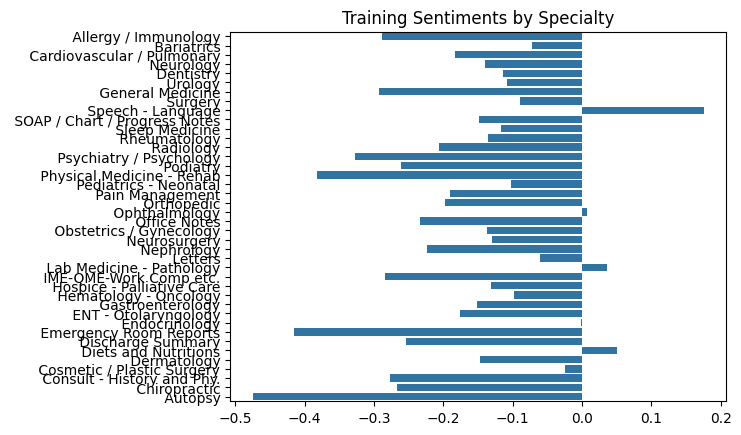

In [ ]:
# Plot training sentiment for each specialty
plt.title("Training Sentiments by Specialty")
sns.barplot(x = avgsentList_train, y = specialtyList)
sns.set_theme(rc = {'figure.figsize':(20,10)})
plt.show()

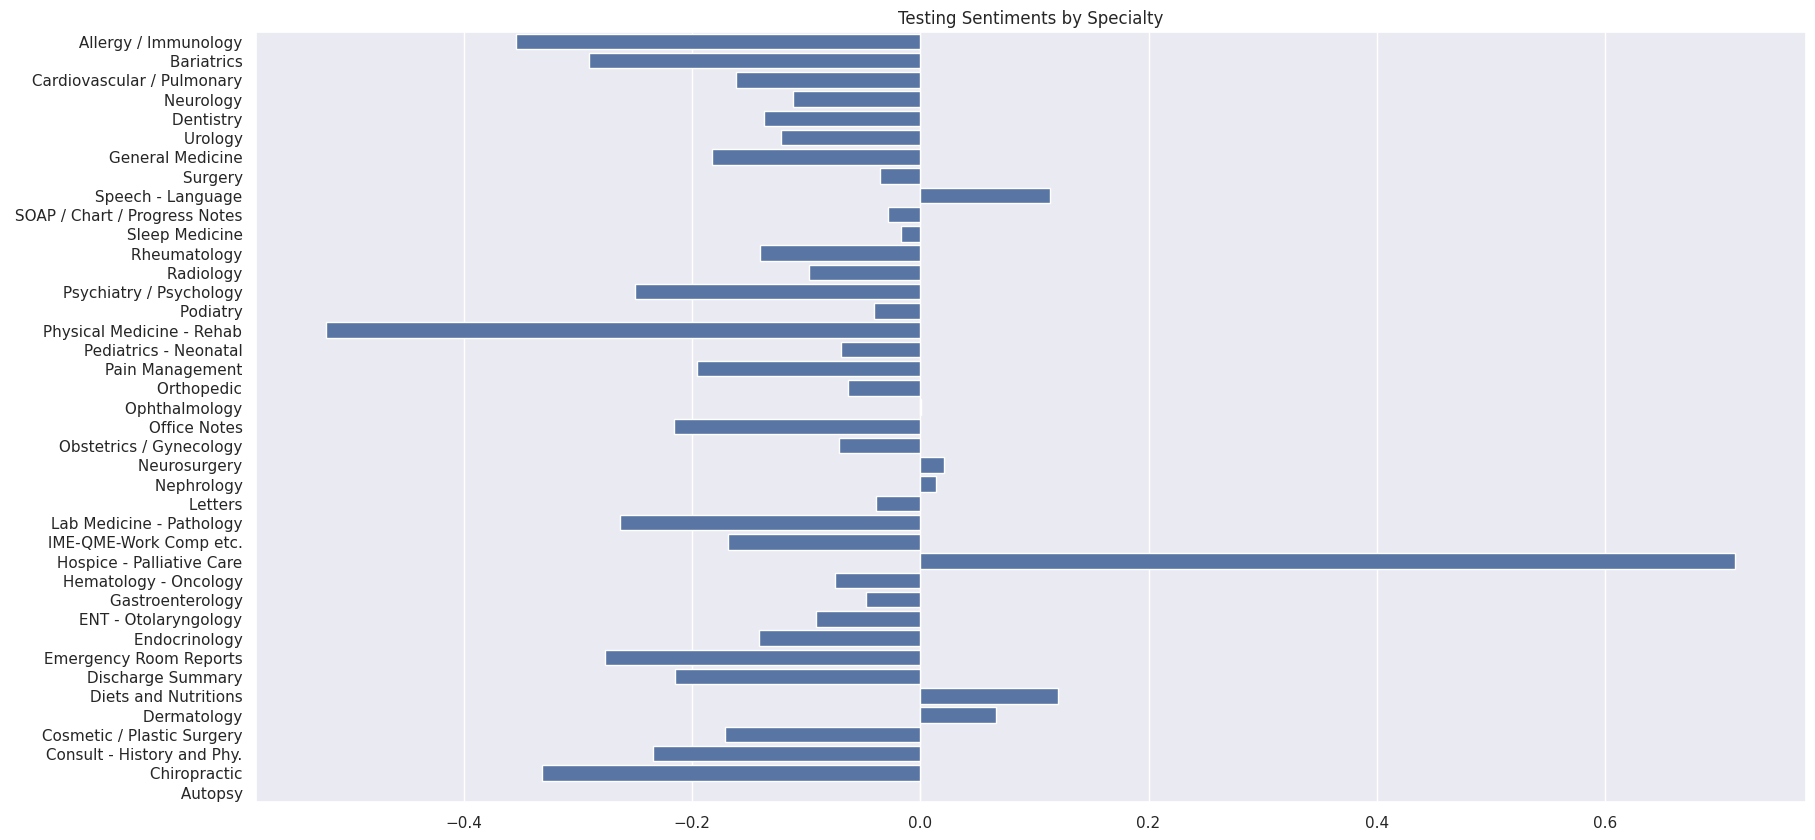

In [ ]:
# Plot testing sentiment for each specialty
plt.title("Testing Sentiments by Specialty")
sns.barplot(x = avgsentList_test, y = specialtyList)
sns.set_theme(rc = {'figure.figsize':(20,10)})
plt.show()

**Observations:**

The above bar plots give us the average sentiment score for training and testing descriptions per medical specialty.
- In both training and testing data, we noticed some interesting patterns.
  - **Speech - Language had positive average sentiment as did Diet and Nutritions. In the testing data, Hospice - Palliative Care had a very positive score.** These medical categories are ones that require positive reinforcements and beneficial feedback and are not life threatening. Learning a new language or forming a diet plan are nowhere close to emergencies and are more associated with teaching and mentorship. Palliative Care is about relieving pain and symptoms so being positive can become a common theme.
  - **Autopsy, Emergency Room Reports, and Physical Medicine - Rehab were medical disciplines that saw much negative average senitment scores.** All 3 of these realms deal with death, post-death, or near-death experiences. These are life threatening circumstances that probably have bad news for the patient or a loved one hence a negative score. Rehab is also a very stressful road back to normality and many struggle along this path.

Next we will dive into the wide spectrum of ranges that sentiments are showcased throughout a specific specialty. Are sentiment scores concentrated near a certain values or are they drastically apart?

In [ ]:
# Calculate the best, worst, and average sentiments based on specialty
bestList = [[] for i in range(len(specialtyList))]
worstList = [[] for i in range(len(specialtyList))]
avgList = [[] for i in range(len(specialtyList))]
for i in range(len(specialtyList)):
    for j in range(len(descriptionsList[i])):
        average = 0
        average += sia.polarity_scores(descriptionsList[i][0])['compound']
        best = sia.polarity_scores(descriptionsList[i][0])['compound']
        worst = sia.polarity_scores(descriptionsList[i][0])['compound']
        if(sia.polarity_scores(descriptionsList[i][j])['compound'] > best):
            best = sia.polarity_scores(descriptionsList[i][j])['compound']
        if(sia.polarity_scores(descriptionsList[i][j])['compound'] < worst):
            worst = sia.polarity_scores(descriptionsList[i][j])['compound']
    bestList[i] = best
    worstList[i] = worst
    avgList[i] = average/(len(descriptionsList[i]))
rangeList = [[] for i in range(len(specialtyList))]
for i in range(len(bestList)):
    rangeList[i] = bestList[i] - worstList[i]
print(avgList)

[-0.04228571428571428, 0.0, 0.0, 0.0, 0.0, 0.0, -0.001474131274131274, -9.310970081595649e-05, 0.011411111111111111, 0.0, -0.014799999999999999, 0.0, -0.0010842490842490843, -0.009633962264150944, -0.009370212765957448, 0.004890476190476191, 0.008369999999999999, 0.005132258064516128, -0.0002892957746478873, 0.0030120481927710845, 0.0030019607843137256, 0.0, 0.0018925531914893616, 0.0, -0.0166, -0.0425, -0.04255, -0.08231666666666666, 0.0, 0.0035547826086956523, -0.006498979591836735, 0.0, 0.0026973333333333333, -0.003721296296296296, 0.06486, 0.0, 0.0, 0.0, 0.0, -0.069675]


In [ ]:
# Print the lists of sentiment scores
print("Best")
print(bestList)
print()
print("Worst")
print(worstList)
print()
print("Range")
print(rangeList)

Best
[-0.296, 0.0, 0.0, 0.0, 0.0, 0.0, -0.3818, 0.0, 0.1027, 0.0, 0.0, 0.0, 0.0, -0.4215, 0.0, 0.1027, 0.5859, 0.3612, 0.0, 0.5423, 0.1531, 0.0, 0.1779, 0.2732, 0.0, 0.0, -0.4215, 0.9349, 0.0, 0.8176, 0.0, 0.0, 0.2023, 0.0, 0.6486, 0.4019, 0.0, 0.0, 0.0, 0.0]

Worst
[-0.7096, -0.3182, -0.8885, 0.0, 0.0, 0.0, -0.7096, -0.1027, 0.0, 0.0, -0.296, 0.0, -0.296, -0.5106, -0.4404, -0.9568, 0.2263, 0.3182, -0.1027, 0.25, 0.0, 0.0, 0.0, 0.0, -0.3818, -0.34, -0.6808, -0.4939, -0.6486, -0.34, -0.6369, 0.0, -0.7096, -0.4019, 0.0, 0.0, 0.0, -0.7096, -0.5106, -0.5574]

Range
[0.4136, 0.3182, 0.8885, 0.0, 0.0, 0.0, 0.32780000000000004, 0.1027, 0.1027, 0.0, 0.296, 0.0, 0.296, 0.08910000000000007, 0.4404, 1.0594999999999999, 0.3596, 0.04300000000000004, 0.1027, 0.2923, 0.1531, 0.0, 0.1779, 0.2732, 0.3818, 0.34, 0.2593, 1.4287999999999998, 0.6486, 1.1576, 0.6369, 0.0, 0.9119, 0.4019, 0.6486, 0.4019, 0.0, 0.7096, 0.5106, 0.5574]


In [ ]:
# Identify the specialties with the best and worst sentiment scores
maxval = bestList[0]
minval = worstList[0]
maxindex = 0
minindex = 0
for i in range(len(bestList)):
    if bestList[i] > maxval:
        maxval = bestList[i]
        maxindex = i
    if worstList[i] < minval:
        minval = worstList[i]
        worstindex = i
print(specialtyList[maxindex],maxval)
print(specialtyList[minindex],minval)

 Hospice - Palliative Care 0.9349
 Allergy / Immunology -0.9568


**Observations:**
- With a max positive sentiment score of 0.939, **Hospice - Palliative Care has the best sentiment**. This type of care for relief is usually motivational and nourishing.
- With a min negative sentimment score of -0.9869, **Allergy / Immunology has the worst sentiment**. Many allergy symptoms are everlasting, especially with autoimmnune diseases.

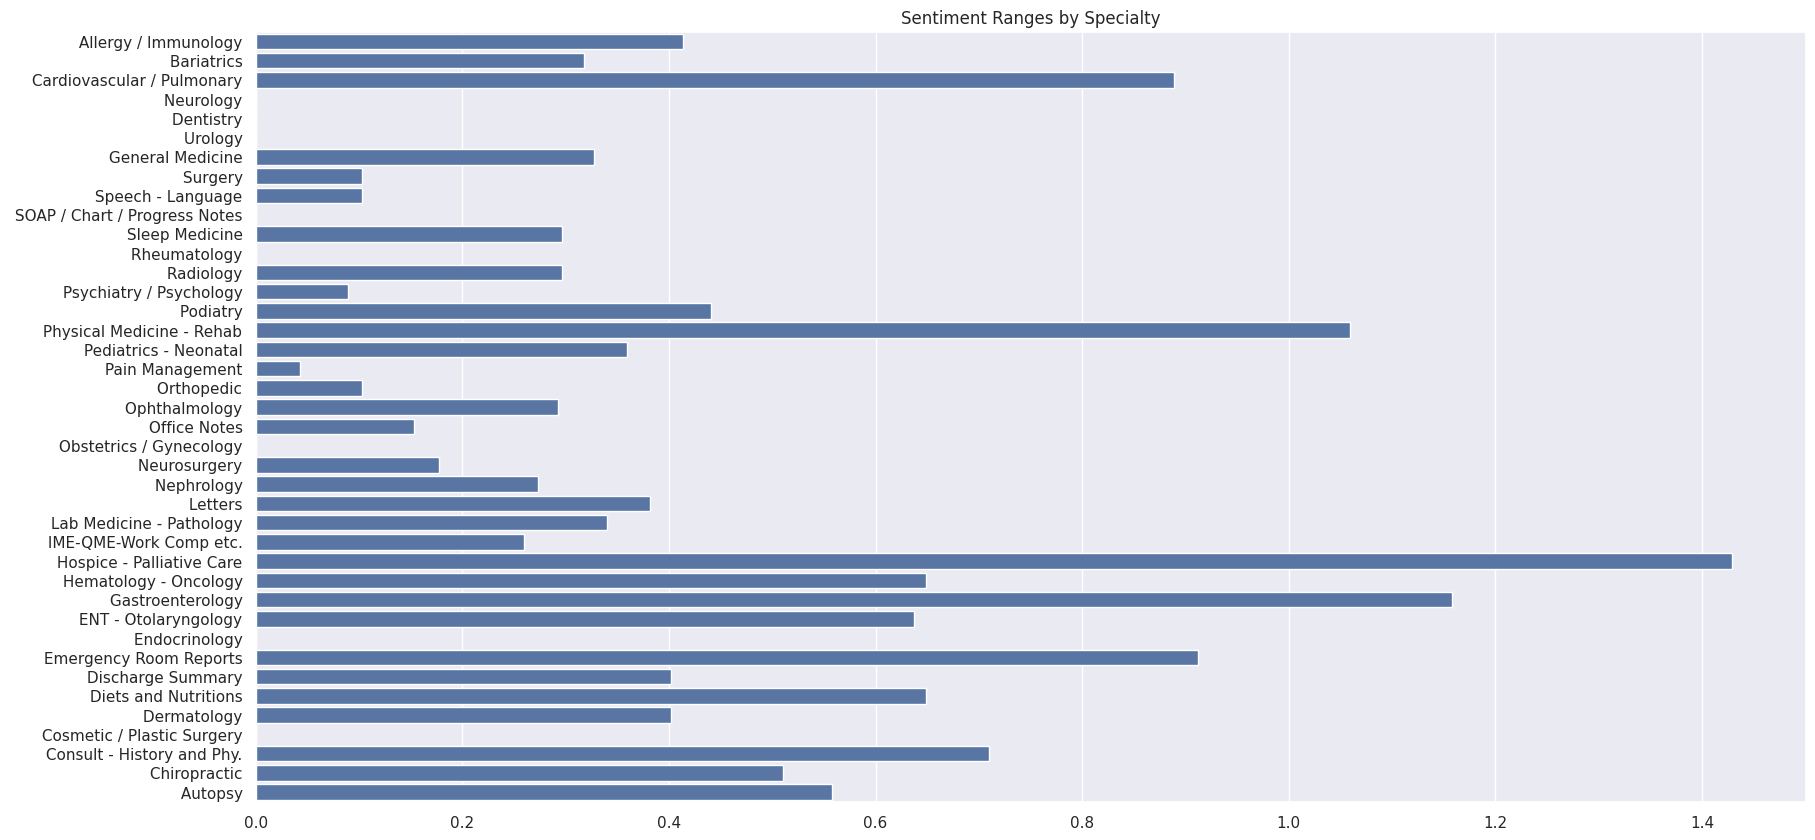

In [ ]:
# Plot sentiment ranges for each specialty
plt.title("Sentiment Ranges by Specialty")
sns.barplot(x = rangeList, y = specialtyList)
sns.set_theme(rc = {'figure.figsize':(20,10)})
plt.show()

**Observations:**
- The above plot gives the difference between the max and min value of sentiment scores of all specialties. **The highest range is present in Hospice - Palliative Care along with Gastroenterology.** This highlights the disparity between negative and positive patient conditions and experiences.

Finding out the number of notes (in this case descriptions) per specialty will help us **normalize our data to put the average scores into proper, accurate context**. We will then compile a complete score (the sum of the average, best, and worst scores per specialty) and divide it with the the sum of each specialty's range and quantity of notes.

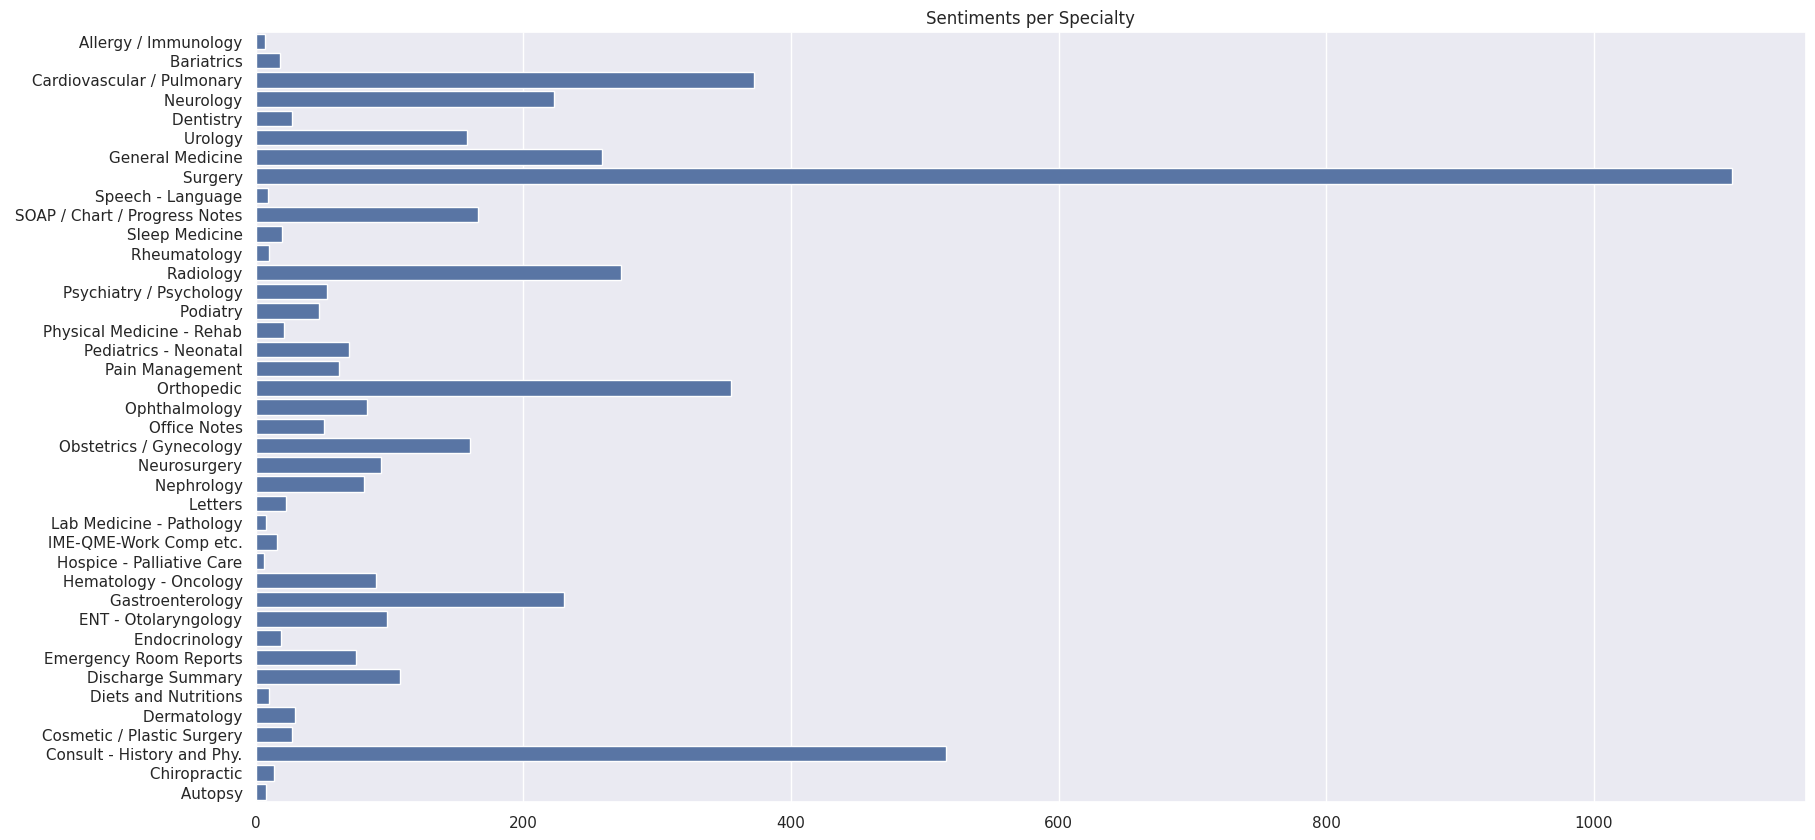

In [ ]:
# Calculate and Plot the number of sentiments per specialty
lengthList = [[] for i in range(len(descriptionsList))]
for i in range(len(descriptionsList)):
    lengthList[i] = len(descriptionsList[i])
plt.title("Sentiments per Specialty")
sns.barplot(x = lengthList, y = specialtyList)
sns.set_theme(rc = {'figure.figsize':(20,10)})
plt.show()

[-0.1413464058332948, -0.017370702361585742, -0.0023827498032253608, 0.0, 0.0, 0.0, -0.0042142575199193115, -9.31854393075241e-05, 0.012535963078109913, 0.0, -0.0153133622388648, 0.0, -0.0010870420682492575, -0.017738744153962885, -0.009480742421353055, -0.03849631785895074, 0.011662516557797372, 0.011033190820310368, -0.0002900267887984177, 0.0095484462332385, 0.0030516617914518127, 0.0, 0.001909073712532233, 0.0033615017004375363, -0.017038893498361973, -0.045863309352517985, -0.07041201035714945, 0.04828280924689496, -0.0071551022299296396, 0.0020815010305034127, -0.006522903493437413, 0.0, -0.0066472142927086085, -0.0037418282917208675, 0.06700035685442217, 0.013669184644529774, 0.0, -0.0013733052376034816, -0.0351880694113269, -0.07327868277747915]


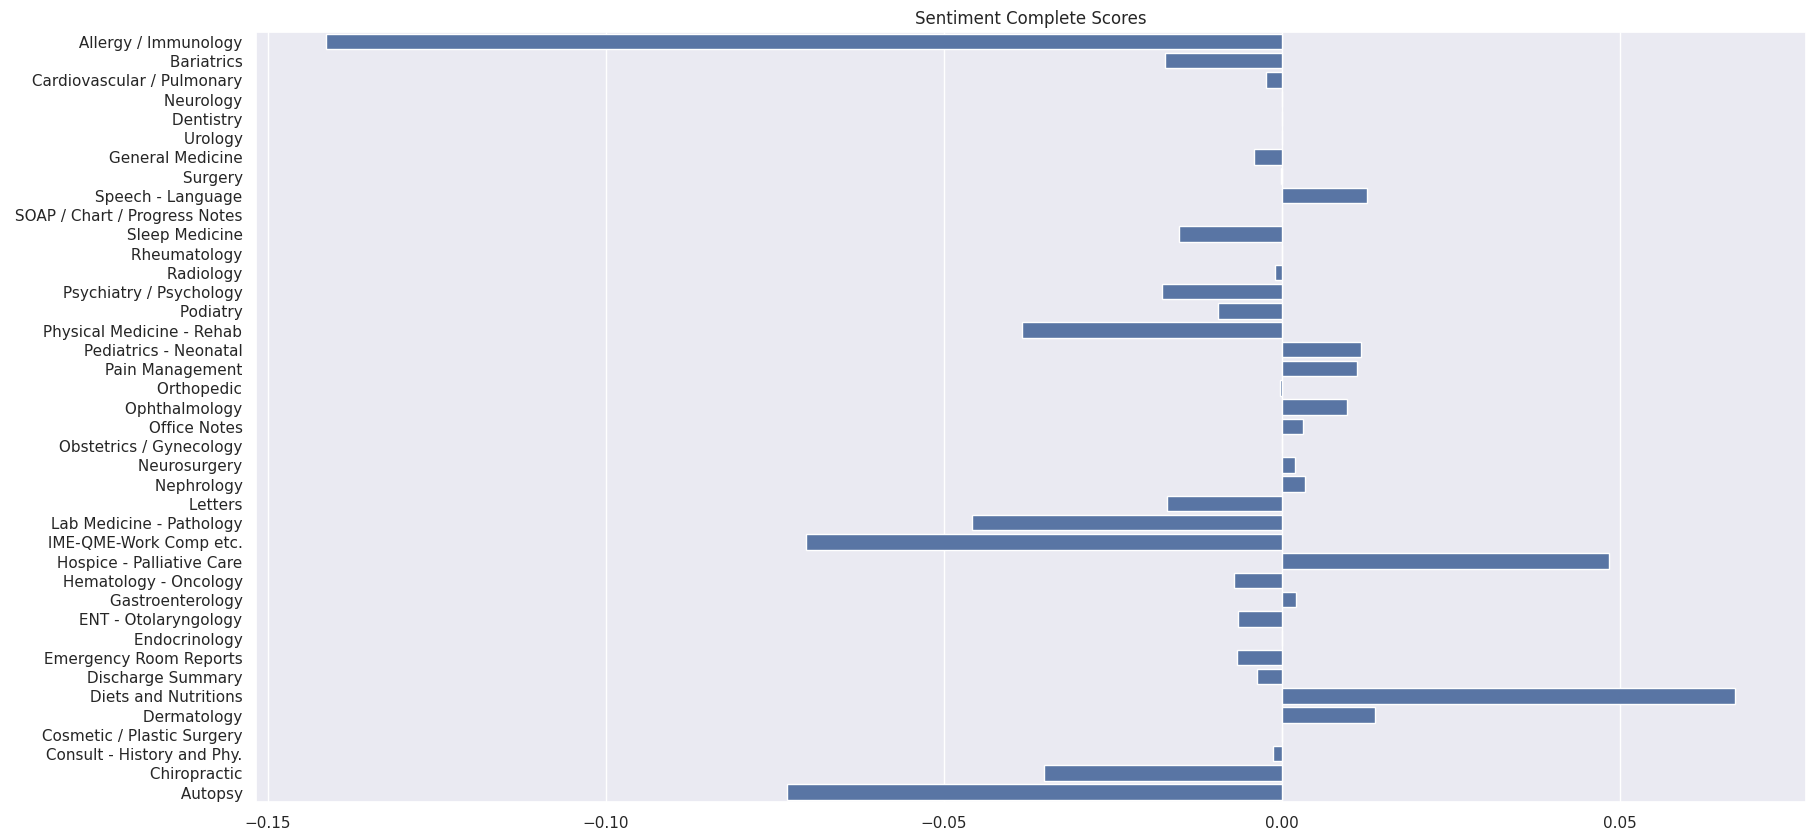

In [ ]:
# Standardize and Plot sentiment scores based on quantity of sentiments per specialty
completescores = [[] for i in range(len(descriptionsList))]
for i in range(len(descriptionsList)):
#     print(type((avgList[i] + bestList[i] + worstList[i])))
#     print(type((rangeList[i]*len(descriptionsList[i]))))
    completescores[i] = (avgList[i] + bestList[i] + worstList[i])/(rangeList[i] + len(descriptionsList[i]))

print(completescores)
plt.title("Sentiment Complete Scores")
sns.barplot(x = completescores, y = specialtyList)
sns.set_theme(rc = {'figure.figsize':(20,10)})
plt.show()

**Observations:**

- **The adjusted complete scores tell us that on average, Allergy / Immunology patient notes have a very negative sentiment along with those from Autopsy notes. Diets and Nutritions along with Hospice - Palliative Care are the two medical categories with the most positive attitudes towards their patient conditions.**
- Sentiment analysis proved that the aggregated transcription notes of patients were largely neutral and that doctors/notetakers didn't give any major emotional swings when describing the medical conditions of patients.  

## Treating Missing Values

- **Since there are missing values that only exist in the keywords and transcription columns, we won't treat any of those missing values nor their corresponding rows.** Our model and overall analysis will be to understand the relationship between descriptions of the patients and medical specialties. If any values in these two columns had missing values, we would further investigate and treat them accordingly.  

## **Important Insights from EDA**

**Observations:**

- Out of 40 total specialties, Surgery was the one with the most notes comprising of more than 20% of the total data.
- The words: "right", "left", "patient", and "history" were found most often within the patient note descriptions.
- The two specialties with the best note sentiments are Diets and Nutritions and Hospice - Palliative Care while the two specialties with the worst note sentiments are Allergy / Immunology and Autopsy.



## **Model Building**

### Model Goals & Outline

What do we want to get out of our modeling?

- The best model is what the one that does what best? Based on our 'medical_specialty' target variable, we know that:
    - A patient note has 40 unique buckets to be classified into.
    - Which category the model places the note will be depenedent on model parameters, fine-tuning, and other text based machine learning tools.
    - **The goal is to get as many accurate predictions as possible and minimize error between the predicted outcome and actual outcome. We want to get as close to 1 for overall model accuracy.**

But what if we get wrong predictions?

- Due to errors, model under/overfitting, wrong predictions are possible. Let's decide how to analyze them.
- Correct Predictions:
    - The medical specialty the note belonged to is the same specialty our model classified the note as. Model instance was correct.
- Incorrect Predictions:
    - The medical specialty the note belonged to is different than the specialty our model classified the note as. Model instance was incorrect.

What evaluation metric to use based on the above possibilities?

- **The evaluation metric we will use will be accuracy.** Accuracy measures the proportion of positive instances (notes) correctly identified in relation to the total instances (notes) identified as positive. Essentially - how often our model gets the right answer.
- For our experimental and exploration purposes, there aren't many downsides to getting an incorrect classification. If we operated as a part of the hospital staff or were hired to as third-party consultants for a specific task, then an incorrect classification would become consequential.
- **We would need to weigh the risks that come with an incorrect classification depending on the scope of the medical specialty in respect to patient healthcare and well-being.**
  - The inclusion of an organized confusion matrix would serve fruitful if the results of our model became consequential. This would also require a slightly different model with binary outcomes (0 or 1) instead of a host of unique categories.


### Data Preprocessing

In [ ]:
# Create a copy of the data for model purposes
dataset = data.copy()

In [ ]:
# Include 12 classes instead of 40 so model runs faster (take out any classes with count < 100)
dataset['medical_specialty'].value_counts(dropna = False)

,count
medical_specialty,
Surgery,1103
Consult - History and Phy.,516
Cardiovascular / Pulmonary,372
Orthopedic,355
Radiology,273
General Medicine,259
Gastroenterology,230
Neurology,223
SOAP / Chart / Progress Notes,166


In [ ]:
# Filter data to only include specialties with more than 99 records
new_data = dataset[dataset.groupby('medical_specialty')['medical_specialty'].transform('size') > 99]
new_data['medical_specialty'].value_counts(dropna = False)

,count
medical_specialty,
Surgery,1103
Consult - History and Phy.,516
Cardiovascular / Pulmonary,372
Orthopedic,355
Radiology,273
General Medicine,259
Gastroenterology,230
Neurology,223
SOAP / Chart / Progress Notes,166


**We will only include classes that have 100 or more patient records for that specific class. We want to avoid running a very time intensive model.** The model will take much longer to train and run if there are few values for that class. For example, Hospice - Palliative Care only has 6 notes out of 5000 total notes. It is not worth it to go run that class within our predictive model.

#### **Preprocessing the textual column**

Here we will take out excess text so our model doesn't go through unimportant words and phrases en route to understanding patient notes.

In [ ]:
# Define a function that edits our text for better interpretability
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Implement function to preprocess the textual column
new_data['description'] = dataset['description'].apply(preprocess_text)

#### **Splitting the dataset**

We will create 3 sets of data to train, validate, and test our classification model.

In [ ]:
# Creating dependent and independent variables
X = new_data['description']
y = new_data['medical_specialty']

In [ ]:
# ##Double check that no specialties have less than 100 counts to ensure proper stratification and efficient run time across classes (training, validation, and testing)
new_data['medical_specialty'].value_counts(dropna = False)

,count
medical_specialty,
Surgery,1103
Consult - History and Phy.,516
Cardiovascular / Pulmonary,372
Orthopedic,355
Radiology,273
General Medicine,259
Gastroenterology,230
Neurology,223
SOAP / Chart / Progress Notes,166


In [ ]:
from sklearn.model_selection import train_test_split

# Initial data split into training (70%) and testing (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.30, stratify = y, random_state = 42)

# Further data split the temporary set into validation (15%) and test (15%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.50, stratify = y_temp, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, X_valid.shape)

(2746,) (589,) (588,)


In [ ]:
print(y_train.shape, y_test.shape, y_valid.shape)

(2746,) (589,) (588,)


- Dataset has been split successfully as per the ratio breakdown we want (70%/15%/15%).

#### **Label encoding**

Through label encoding, we assign categorical values with numerical values enabling their compatibility with machine learning models that exclusively operate on numerical data.

In [ ]:
# Transform categorical dependent columns into numerical format
encoder = LabelEncoder()

# Fit the encoder to the training labels
y_train_enc = encoder.fit_transform(y_train)

# Apply the encoder mapping from training labels to validation and test labels
y_valid_enc = encoder.transform(y_valid)
y_test_enc = encoder.transform(y_test)

### Model Generation

#### **Tokenizing words to match BERT model's input**

Tokenization is the process of splitting up text into smaller parts such as phrases, characters, and subwords so that meaning and context can be derived from different texts. We will use the BERT (Bidirectional Encoder Representations from Transformers) Tokenizer to format inputs so they can be used in the BERT model.

In [ ]:
# Load and Create an instance of the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)
# do_lower_case argument converts the input to lowercase when it is set to True

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Specify the maximum length of the input
max_length = 512

In [ ]:
X_train_tokenized = tokenizer(
    X_train.values.tolist(),      # passes the data as a list to the tokenizer
    max_length = max_length,      # specifies the maximum length of the tokenized data
    padding = 'max_length',       # pads the data to the specified maximum length
    truncation = True,            # truncates the input if it is longer than the specified maximum length
    return_attention_mask = True, # specifies to return attention masks
    return_tensors = 'tf',        # specifies to return the output as tensorflow tensors
)

In [ ]:
X_valid_tokenized = tokenizer(
    X_valid.values.tolist(),
    max_length = max_length,
    padding = 'max_length',
    truncation = True,
    return_attention_mask = True,
    return_tensors = 'tf',
)

In [ ]:
X_test_tokenized = tokenizer(
    X_test.values.tolist(),
    max_length = max_length,
    padding = 'max_length',
    truncation = True,
    return_attention_mask = True,
    return_tensors = 'tf',
)

#### **Creating tensorflow datasets**

Converting regular data into a batched tensorflow dataset helps in optimizing memory usage. We can do that through the following steps.

1. Convert the tokenized input into a dictionary
2. Zip the dictionary and target labels into a tensorflow dataset
3. Split the tensorflow dataset into batches

In [ ]:
# Define the size of the batches
batch_size = 8

# Convert the tokenized input and the output into a batched tensorflow dataset for training
train_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_train_tokenized), y_train_enc)).batch(batch_size)

# Convert the tokenized input and the output into a batched tensorflow dataset for validation
valid_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_valid_tokenized), y_valid_enc)).batch(batch_size)

# Convert the tokenized input and the output into a batched tensorflow dataset for testing
test_tokenized_tf = tf.data.Dataset.from_tensor_slices((dict(X_test_tokenized), y_test_enc)).batch(batch_size)

#### **Loading the BERT Model**

BERT is a pre-trained natural language processing (NLP) model developed by Google. BERT is designed to understand the context of words in a sentence by considering the entire sentence bidirectionally, rather than just in a left-to-right or right-to-left manner. This bidirectional approach allows BERT to capture complex contextual relationships and dependencies between words, making it highly effective for various NLP tasks.

In [ ]:
num_classes = y.nunique()
num_classes

12

#### **Fine-tuning the BERT Model**

To fine-tine our BERT model and the rigorousnes of its text classification, we will utilize TFBertForSequenceClassification. This class in the Hugging Face Transformers library specifically for sequence classification tasks using TensorFlow. When using this class, we load our 'bert-base-uncased' model or any pre-trained BERT model and fine-tune it on our specific classification task by providing labeled training data. The model will then be used to make predictions on new sequences of text.

In [ ]:
# Initialize model using BERT for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = num_classes)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Print the summary of the model
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  9228      
                                                                 
Total params: 109491468 (417.68 MB)
Trainable params: 109491468 (417.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set the learning rate for the optimizer
learning_rate = 1e-5

# Set the optimizer to Adam
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate, epsilon = 1e-08) # epsilon determines how random we take a particular action

# Specify the loss function for the model
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

# Define evaluation metric(s) for the model
metric = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model with the chosen optimizer, loss function, and metrics
model.compile(optimizer = optimizer, loss = loss, metrics = metric)

We will need to rebalance classes to prevent class imbalance. This happens when the distribution of classes in the training data is not uniform, meaning some classes have significantly fewer examples than others. In our case, Surgery specialty show up the most with 1103 notes whil Hospice - Palliative Care shows up only 6 times. To prevent our model from being trained on imbalanced datasets creating potential bias toward the majority class and perform poorly on minority classes, we will balance the specialties.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train_enc.shape[0]) / np.bincount(y_train_enc)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[encoder.transform(encoder.classes_)[i]] = cw[i]

Next, we have to determine the number of epochs or the number of times the entire training dataset is passed forward and backward through the neural network. Each pass through the entire dataset is considered one epoch. To minimize model error (predicted minus actual), choosing an appropriate number of training epochs is crucial for achieving good performance without overfitting or underfitting the model. Since we are fine-tuning an already existing BERT model, we shouldn't need a large number of epochs.

In [ ]:
# Set the number of training epochs
n_epochs = 6

bert_base_tuned = model.fit(train_tokenized_tf, epochs = n_epochs, validation_data = valid_tokenized_tf, class_weight = cw_dict)

Epoch 1/6
344/344 [==============================] - 343s 996ms/step - loss: 14.0597 - accuracy: 0.4982 - val_loss: 1.7812 - val_accuracy: 0.3486
Epoch 2/6
344/344 [==============================] - 342s 995ms/step - loss: 12.2131 - accuracy: 0.5353 - val_loss: 1.7939 - val_accuracy: 0.3452
Epoch 3/6
344/344 [==============================] - 342s 995ms/step - loss: 11.0151 - accuracy: 0.5608 - val_loss: 1.7866 - val_accuracy: 0.3452
Epoch 4/6
344/344 [==============================] - 342s 995ms/step - loss: 10.0657 - accuracy: 0.5852 - val_loss: 1.8351 - val_accuracy: 0.3333
Epoch 5/6
344/344 [==============================] - 342s 995ms/step - loss: 9.1820 - accuracy: 0.6045 - val_loss: 1.9088 - val_accuracy: 0.3214
Epoch 6/6
344/344 [==============================] - 359s 1s/step - loss: 8.7335 - accuracy: 0.6224 - val_loss: 1.9877 - val_accuracy: 0.3163


In [ ]:
# Generate raw predictions on the validation dataset using the trained model
preds_raw_val = model.predict(valid_tokenized_tf)

# Extract predicted labels by finding the index with the highest probability for each example
preds_val = np.argmax(np.array(tf.nn.softmax(preds_raw_val.logits)), axis = 1)

# Display the shape of the predicted labels array
preds_val.shape

74/74 [==============================] - 25s 331ms/step


(588,)

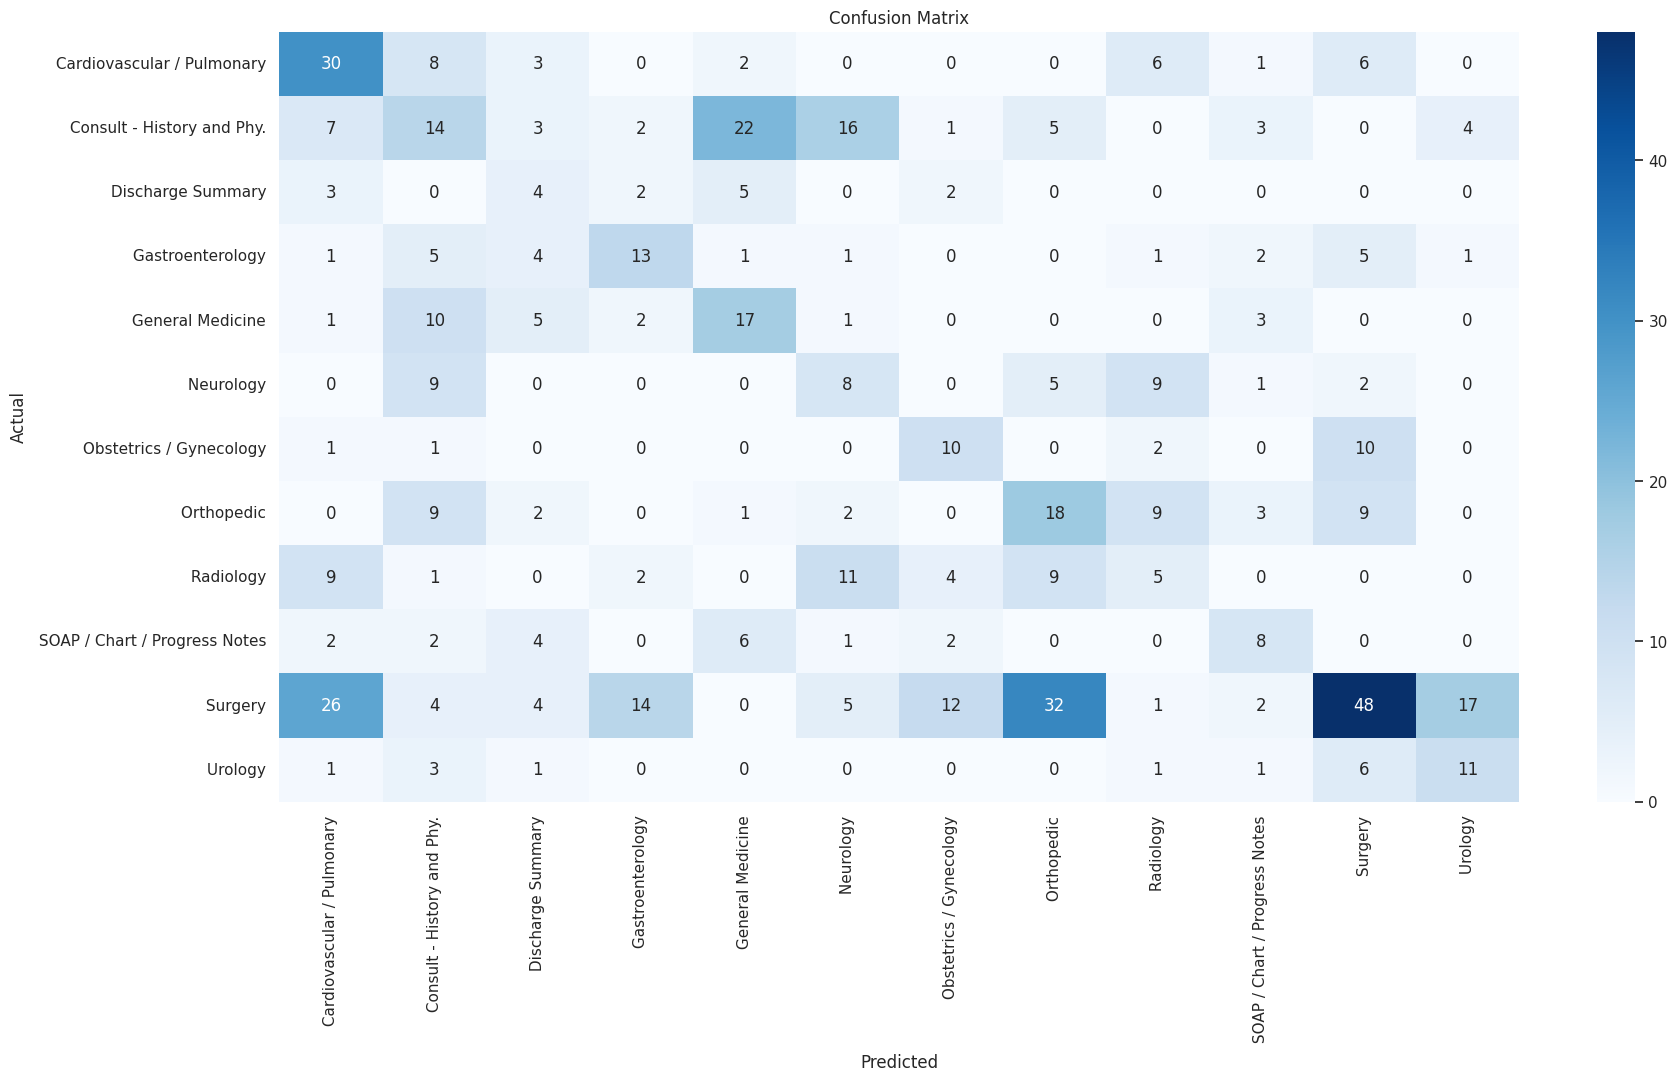

In [ ]:
# Retrieve the labels from the tensorflow dataset
actual_val = np.concatenate([y for x, y in valid_tokenized_tf], axis = 0)

# Create confusion matrix
cnf_mt = confusion_matrix(actual_val, preds_val)

# Visualize confusion matrix using a heatmap
labels = encoder.classes_.tolist()
sns.heatmap(cnf_mt, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display classification report
print('Classification Report:')
print(classification_report(actual_val, preds_val))

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.54      0.44        56
           1       0.21      0.18      0.20        77
           2       0.13      0.25      0.17        16
           3       0.37      0.38      0.38        34
           4       0.31      0.44      0.37        39
           5       0.18      0.24      0.20        34
           6       0.32      0.42      0.36        24
           7       0.26      0.34      0.30        53
           8       0.15      0.12      0.13        41
           9       0.33      0.32      0.33        25
          10       0.56      0.29      0.38       165
          11       0.33      0.46      0.39        24

    accuracy                           0.32       588
   macro avg       0.29      0.33      0.30       588
weighted avg       0.35      0.32      0.32       588



**Observations:**

- The model achieved ~32% accuracy on the validation set. This is a fairly low measure of how well our model sorted patient notes into the correct specialty.
- Looking at the precision, recall, and f-1 score from category to category, there isn't much pattern with the score compared to the support or number of notes in that category. However, there maybe other internal workings within the neural network that influence scores based on class imbalance.
- Of the 165 Surgery notes utilized in the validation set, only 48 were classified correctly. Of the 100+ incorrectly classified, majority were sorted into Orthopedic and Cardiovascular / Pulmonary specialties. These three realms of medicine share the surgical theme and therefore, the model may have misplaced these notes. Medicine is one huge umbrella with several overlapping disciplinaries. So many realms are connected and in this case, a Surgery note that may have included details regarding Orthopedic surgery, may have been placed into the Orthopedic specialty. A Surgery note that may have included heart or lung surgery may have gone into the Cardiovascular / Pulmonary specialty.
- More advanced techniques would be needed for the model to more robustly analyze textual data given low accuracy among many measures.

## **Model Testing**

In [ ]:
# Generate raw predictions on the testing dataset using the tested model
preds_raw_test = model.predict(test_tokenized_tf)

# Extract predicted labels by finding the index with the highest probability for each example
preds_test = np.argmax(np.array(tf.nn.softmax(preds_raw_test.logits)), axis = 1)

# Display the shape of the predicted labels array
preds_test.shape

74/74 [==============================] - 25s 341ms/step


(589,)

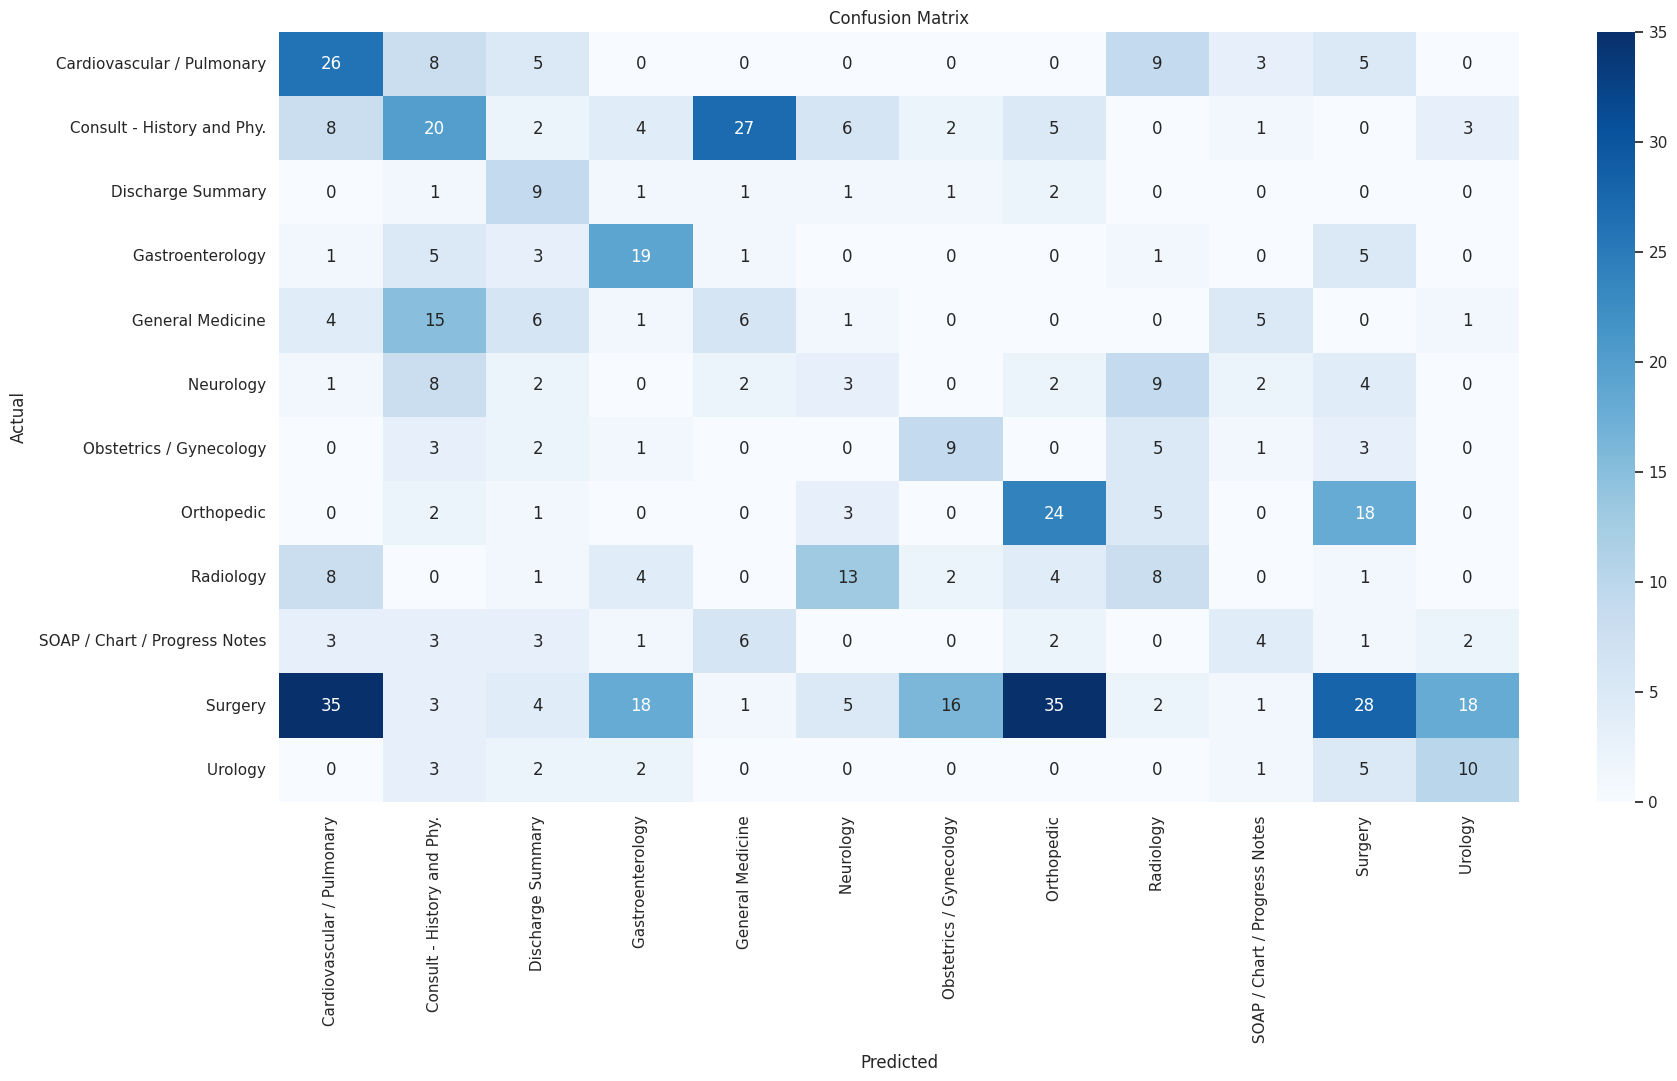

In [ ]:
# Retrieve the labels from the tensorflow dataset
actual_test = np.concatenate([y for x, y in test_tokenized_tf], axis = 0)

# Create confusion matrix
cnf_mt = confusion_matrix(actual_test, preds_test)

# Visualize confusion matrix using a heatmap
labels = encoder.classes_.tolist()
sns.heatmap(cnf_mt, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display classification report
print('Classification Report:')
print(classification_report(actual_test, preds_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.46      0.37        56
           1       0.28      0.26      0.27        78
           2       0.23      0.56      0.32        16
           3       0.37      0.54      0.44        35
           4       0.14      0.15      0.14        39
           5       0.09      0.09      0.09        33
           6       0.30      0.38      0.33        24
           7       0.32      0.45      0.38        53
           8       0.21      0.20      0.20        41
           9       0.22      0.16      0.19        25
          10       0.40      0.17      0.24       166
          11       0.29      0.43      0.35        23

    accuracy                           0.28       589
   macro avg       0.26      0.32      0.28       589
weighted avg       0.30      0.28      0.27       589



**Observations:**

- The model achieved ~28% accuracy on the test set. The model performed slightly worse on the testing dataset than the validation set by 4 percentage points.
- Similiar patterns of mixed up (incorrect) notes between many medical specialties persist. Having 12 buckets which is a lot more than 2 categories in a binary outcome problem, means a much larger chance of error in getting notes correctly placed. More epochs could have been ran to train the BERT model but additional tuning is definitely required.
- The overlap among medical practices may also be understated since practices such as Consult - History and Phys., General Medicine, and Progress Notes are all vague specialties that can possess several keywords and context that allow the model to place the note elsewhere. There is much note misplacement between the 3 in both validation and testing data.

## **Recommendations for Implementation**

Our fine-tuned BERT model to classify diverse patient notes into different medical specialties should not be used. The accuracy of the model sits below the 30% ballpark and is way too low for real world application.

If executed at a preliminary level or once a higher accuracy is achieved, the following should be done.

1. In order to ensure privacy and security of confidential patient data, a thorough check of both existing and new hospital data frameworks should be done. Accessability to the data as well as viewing and editing controls should be in compliance with federal, state, and local laws.   

2. A well-thought-out timeline with metrics and guardrails should be presented to monitor the changes of such a model. It is imperative that hospitals and relative stakeholders start with a small sample of patients for their experimental trial of the model before exposing the entire patient database to the model.

3. This project will involve numerous departments and their employees across many stakeholders. A smooth transition into the current note gathering and storing process will be integral. Technology teams will also have to be onboarded and tasked with necessary roles for infrastructure upkeep along with their IT resources.



## **Further Analysis**

Medical systems should look to continously revise their data infrastructure to optimize their financial resources and understand its patients better. Here a few ideas to consider when doing so:

1. **Editing the fine-tuning procedures of the model** may give us higher accuracy. The number of epochs ran and the learning rate applied as well as the overarching BERT model should all be scrutinized to gauge what yearns more accurate and realistic results. SMOTE (Synthetic Minority Over-sampling Technique) to balance minority classes better, TF-IDF Vectorizers (Term Frequency Inverse Document Frequency) to capture text relevancy, RoBERTa pretrained model for more defined tuning and GridSearchCV for the best parameters could be mechanisms to investigate.

2. **The inclusion of numerical variables along with text** could possibly help the model connect dots with textual data in order to identify the specialty more accurately. If the model learns of specific blood test markers that are associated with a specific disease or field of medicine, the accuracy rate could be much higher. More investigation on this would be needed.

3. To further improve the model performance, especially on the minority categories (Rheumatology, Allergy - Immunology, and Lab Medicine - Pathology), one can **collect more patient notes from these categories**. There can be an existing minimum threshold for each specialty so that the model trains well on real data. Along with regularly retraining the model, this is one way to drive down the error rate.